In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *
from sgpi.util import get_dataset
from sgpi.mnist import *
import itertools

import pysgpp as sg
import numpy as np
from matplotlib.gridspec import GridSpec


sns.set_palette("Dark2")

from mpl_toolkits.mplot3d import Axes3D

ImportError: libsgppquadrature.so: cannot open shared object file: No such file or directory

In [2]:
def hat(x):
    return max(1- abs(x), 0)

def linear_1(x, level, index):
    return hat((2**level)*x-index)

def linear_mod_1(x, level, index):
    if level == 1 and index == 1:
        return 1
    if level > 1:
        if index == 1:
            if 0 <= x <= 2**(1-level):
                return 2-2**level*x
            else:
                return 0
        if index == 2**level - 1:
            if 1-2**(1-level) <= x <= 1:
                return 2**level*x - index + 1
            else:
                return 0
    return hat(2**level*x-index)

def linear_d(x, level, index, mod=False):
    eval = 1.0
    for k,(l, i) in enumerate(zip(level, index)):
        if mod:
            eval = eval * linear_mod_1(x[k], l, i)
        else:
            eval = eval * linear_1(x[k], l, i)
    return eval

def i_for_l(level):
    return [i for i in range(0, 2**level) if i % 2 == 1]

In [3]:
def get_max(x, y):
    return x[np.where(y == max(y))], max(y)

In [4]:
def plot_1d_basis(level, mod=False, scale=0.4, fig=None, ax=None):
    x = np.linspace(0, 1, num=2000)
    indices = i_for_l(level)
    ys = []
    for i in indices:
        if mod:
            ys.append([linear_mod_1(xi, level, i) for xi in x]) 
        else:
            ys.append([linear_1(xi, level, i) for xi in x])
    despine = False
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize(scale=scale))
        despine = True
    for y, index in zip(ys, indices):
        y_pos = np.where(y)[0]
        y_mod = np.array(y)[y_pos]
        x_mod = np.array(x)[y_pos]
        y_max = get_max(x, y)
        ax.annotate(r"$\varphi_{" + str(level) + ","  + str(index) + r"}$", y_max)
        ax.plot(x_mod,y_mod)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$\varphi_{" + str(level) + r", \boldsymbol{i}} (x) $")
    if despine:
        sns.despine(fig)
    return fig, ax

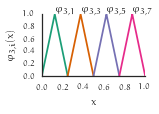

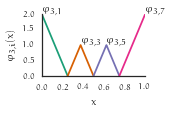

In [31]:
fig, ax = plot_1d_basis(3)
fig.subplots_adjust(left=0.23, bottom=0.30, right=0.85)
fig.savefig("../writing/thesis/figures/lin_1d_3.pdf")
fig, ax = plot_1d_basis(3, True)
fig.subplots_adjust(left=0.23, bottom=0.30, right=0.85)
fig.savefig("../writing/thesis/figures/lin_mod_1d_3.pdf")

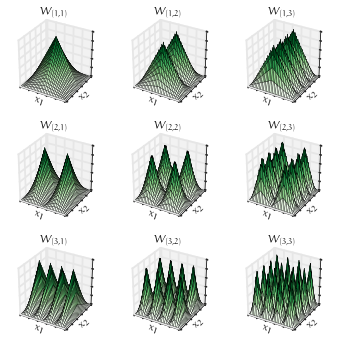

In [68]:
size = figsize(1.0)
fig = plt.figure(figsize=(size[0], size[0]))
max_level = 3
for l1, l2 in itertools.product(range(max_level), range(max_level)):
    l1 = l1 + 1
    l2 = l2 + 1
    nth_plot = (l1-1)*max_level + l2
    ax = fig.add_subplot(max_level, max_level, nth_plot, projection='3d')
    level = [l1,l2]
    [i1s, i2s] = [i_for_l(l) for l in level]
    num = 300
    x1 = np.linspace(0, 1, num=num)
    [xx,yy] = np.meshgrid(x1, x1)
    ys = [] # List of all evaluations of basis functions.
    # The following code is a really ugly hack.
    # Matplotlib cannot handle multiple surface plots.
    # The following code only works, because the basis functions have disjoint support.
    for i1 in i1s:
        index = [0] * 2
        index[0] = i1
        for i2 in i2s:
            index[1] = i2
            y = np.array([linear_d([y,x], level, index, mod=False) for x in x1 for y in x1])
            ys.append(y)
    y = [0] * len(ys[0])
    for i in range(len(ys[0])):
        cur_max = 0
        for l in ys:
            cur_max = max(cur_max, l[i]) # l[i] can only be > 0 for one basis function!
        y[i] = cur_max
    y = np.array(y).reshape(num,num)
    ax.plot_surface(xx, yy, y, cmap='Greens', shade=False)
    ax.set_xlabel(r"$x_1$", labelpad=-15)
    ax.set_ylabel(r"$x_2$", labelpad=-15)
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', labelleft='off')
    ax.tick_params(axis='z', which='both', bottom='off', top='off', labelleft='off')
    #ax.set_zlabel(r"Values of basis function")
    #ax.view_init(elev=45, azim=45)
    title = r"$W_{(" + str(l1) + "," + str(l2) + r")}$"
    ax.set_title(title, loc='center')
    ax.set(adjustable='box-forced', aspect='equal')
fig.savefig("../writing/thesis/figures/lin_2d_3.pdf", bbox_inches='tight')

In [695]:
figsize()

[5.7874021032240215, 3.5768112063550732]

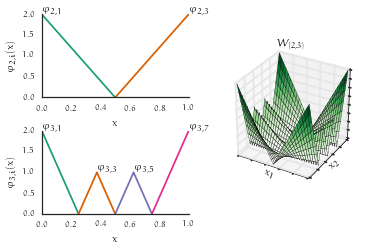

In [5]:
fig = plt.figure()
gs=GridSpec(2,2)
ax11 = fig.add_subplot(gs[0,0])
ax12 = fig.add_subplot(gs[1,0])
ax2d = fig.add_subplot(gs[:,1], projection='3d')
plot_1d_basis(2, True, fig=fig, ax=ax11)
plot_1d_basis(3, True, fig=fig, ax=ax12)
# Plot 2d basis
level = [2,3]
[i1s, i2s] = [i_for_l(l) for l in level]
num = 300
x1 = np.linspace(0, 1, num=num)
[xx,yy] = np.meshgrid(x1, x1)
ys = []
for i1 in i1s:
    index = [0] * 2
    index[0] = i1
    for i2 in i2s:
        index[1] = i2
        y = np.array([linear_d([y,x], level, index, mod=True) for x in x1 for y in x1])
        ys.append(y)
y = [0] * len(ys[0])
for i in range(len(ys[0])):
    cur_max = 0
    for l in ys:
        cur_max = max(cur_max, l[i]) # l[i] can only be > 0 for one basis function!
    y[i] = cur_max
y = np.array(y).reshape(num,num)
ax2d.plot_surface(xx, yy, y, cmap='Greens', shade=False)
ax2d.set_xlabel(r"$x_1$", labelpad=-15)
ax2d.set_ylabel(r"$x_2$", labelpad=-15)
ax2d.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax2d.tick_params(axis='y', which='both', labelleft='off')
ax2d.tick_params(axis='z', which='both', bottom='off', top='off', labelleft='off')
title = r"$W_{(" + str(level[0]) + "," + str(level[1]) + r")}$"
ax2d.set_title(title, loc='center')
ax2d.set(adjustable='box-forced', aspect='equal')
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)

fig.subplots_adjust(hspace=0.4)
fig.savefig("../writing/thesis/figures/lin_mod_1d2d.pdf", transparent=True)

In [5]:
grid = sg.Grid.createLinearGrid(2)
gen = grid.getGenerator()
gen.regular(2)
grid.getSize()

5

In [139]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
X, y = make_circles(factor=0.85)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
x1 = X[:,0]
x2 = X[:,1]
r = np.exp(np.dot(x1,x2))
a = x1

ValueError: x and y must be the same size

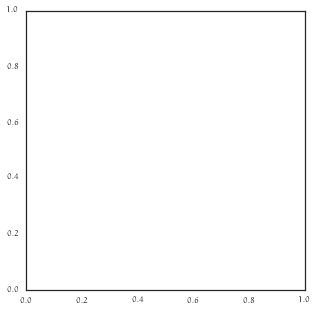

In [140]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(r, a, c=y)

72004899337.38562

In [7]:
from sgpi.util import get_Phi
Phi = get_Phi(grid, X)
Phi.shape
np.matrix(y).T.shape, b0.shape

NameError: name 'b0' is not defined

In [8]:
b0 = Phi[:,0]
b1 = Phi[:,1]
b2 = Phi[:,2]
b3 = Phi[:,3]
b4 = Phi[:,4]


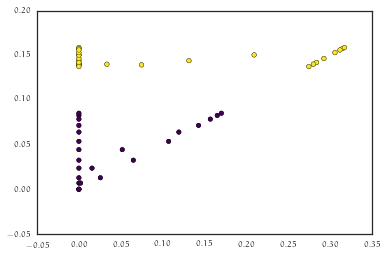

In [4]:
from matplotlib.gridspec import GridSpec

NameError: name 'b1' is not defined

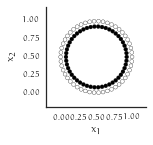

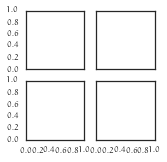

In [5]:
size = figsize(0.4)[0]
fig, ax = plt.subplots(figsize=(size, size))
ax.scatter(x1, x2, c=y, s=15)
ax.set_xticks(np.linspace(0,1, 5))
ax.set_yticks(np.linspace(0,1, 5))
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set(adjustable='box-forced', aspect='equal')
sns.despine(fig)
fig.subplots_adjust(left=0.3)
fig.savefig("../writing/thesis/figures/circle.pdf", transparent=True)

fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(size, size))

axs[0][0].scatter(b1, b0, c=y, s=10)
axs[0][1].scatter(b2, b0, c=y, s=15)
axs[1][0].scatter(b3, b0, c=y, s=15)
axs[1][1].scatter(b4, b0, c=y, s=15)


axs[0][0].set_xticks(np.linspace(0.0, 0.40, num=3))
axs[0][0].set_yticks(np.linspace(0.0, 0.20, num=5))
axs[0][0].set_yticklabels(np.linspace(0.0, 0.20, num=5), va='top')

axs[0][0].set_xlabel(r"$\phi_2 (\boldsymbol{x})$", )
axs[0][1].set_xlabel(r"$\phi_3 (\boldsymbol{x})$")
axs[1][0].set_xlabel(r"$\phi_4 (\boldsymbol{x})$")
axs[1][1].set_xlabel(r"$\phi_5 (\boldsymbol{x})$")

axs[0][0].set_ylabel(r"$\phi_1 (\boldsymbol{x})$")
axs[1][0].set_ylabel(r"$\phi_1 (\boldsymbol{x})$")

sns.despine(fig)
fig.subplots_adjust(left=0.25, bottom=0.2, hspace=0.3)
fig.savefig("../writing/thesis/figures/feature_trans_polar.pdf", transparent=True)

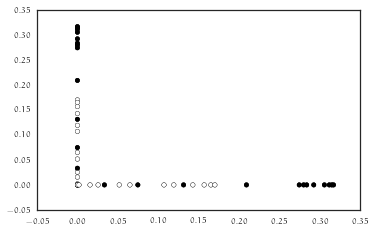

In [15]:
plt.scatter(b4,b3,c=y)

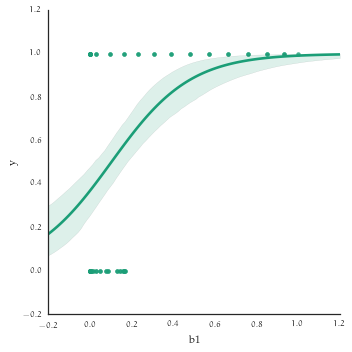

In [391]:
sns.lmplot(x='b1', y='y', data=df, logistic=True, )

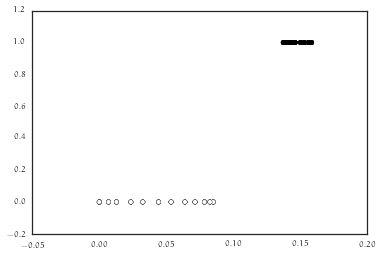

In [395]:
plt.scatter(b0, y, c=y)